In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.iolib.table import SimpleTable, default_txt_fmt

from statsmodels.compat import lzip

from scipy.linalg import toeplitz

# Python Lab 
## Estudio dirigido de las materias: Integración de la investigación o Propuesta de investigación 

We base the examples and data of this document on the book of Wooldridge, J. (2013). Introductory Econometrics: A Modern Approach. Cengage Learning.

Also, we apply the Python library 
<a href="https://www.statsmodels.org/stable/regression.html" target="_blank">Stats modelels.</a>

## Chapter 3
### Example 3.1 Determinants of College GPA

First we read the gpa1 Wooldridge dataset

In [2]:
gpa1=pd.read_csv("data/gpa1.csv",index_col=0)
gpa1

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
1,21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2.0,1.0,1,0,0
2,21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0.0,1.0,1,1,1
3,20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0.0,1.0,1,1,1
4,19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0.0,0.0,0,0,0
5,20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0.0,1.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,22,0,0,0,1,0,0,1,0,3.0,...,0,1,1,1,1,0.0,0.0,1,0,0
138,21,0,0,1,0,1,0,1,0,2.3,...,0,1,1,0,0,1.0,1.0,1,0,0
139,20,0,1,0,0,0,0,1,0,2.8,...,0,1,1,1,0,0.0,0.3,1,0,0
140,20,0,1,0,0,1,1,1,0,3.4,...,1,1,1,1,1,3.0,4.0,1,0,1


The index_col=0 argument is to set the first column of the csv file the index of the data frame 

In [3]:
# Remember that to know what other arguments a function such as pd.read_csv has, we run: 
#the name of the function following by?
# pd.read_csv?

Next we add the constant to the model, which in terms of Wooldridge terminology is $\beta_{0}$ in the model:

\begin{align}
y =\beta_{0}+\beta_{1}x_{1}+,..,+\beta_{n}x_{n}+u 
\end{align}

In [4]:
gpa1=sm.add_constant(gpa1,prepend=False)
gpa1

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll,const
1,21,0,0,1,0,0,0,1,0,3.0,...,1,1,0,0,2.0,1.0,1,0,0,1.0
2,21,0,0,1,0,0,0,1,0,3.4,...,1,0,1,1,0.0,1.0,1,1,1,1.0
3,20,0,1,0,0,0,0,1,0,3.0,...,1,1,0,1,0.0,1.0,1,1,1,1.0
4,19,1,0,0,0,1,1,1,0,3.5,...,0,1,0,0,0.0,0.0,0,0,0,1.0
5,20,0,1,0,0,0,0,1,0,3.6,...,1,1,1,0,0.0,1.5,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,22,0,0,0,1,0,0,1,0,3.0,...,1,1,1,1,0.0,0.0,1,0,0,1.0
138,21,0,0,1,0,1,0,1,0,2.3,...,1,1,0,0,1.0,1.0,1,0,0,1.0
139,20,0,1,0,0,0,0,1,0,2.8,...,1,1,1,0,0.0,0.3,1,0,0,1.0
140,20,0,1,0,0,1,1,1,0,3.4,...,1,1,1,1,3.0,4.0,1,0,1,1.0


Regarding the "prepend", if it is false, the constant will be situated as the last column of the data frame. If true, as the first column. Next, we define the dependent variable, which is *y* in the model:

\begin{align}
y =\beta_{0}+\beta_{1}x_{1}+,..,+\beta_{n}x_{n}+u 
\end{align}

In [5]:
y=gpa1["colGPA"]
y

1      3.0
2      3.4
3      3.0
4      3.5
5      3.6
      ... 
137    3.0
138    2.3
139    2.8
140    3.4
141    2.8
Name: colGPA, Length: 141, dtype: float64

To run the regression of the example 3.1, "Determinants of College GPA," we collect only the variables:  "const", "hsGPA", and "ACT"

In [6]:
X=gpa1[["const","hsGPA","ACT"]]
X

,const,hsGPA,ACT
1,1.0,3.0,21
2,1.0,3.2,24
3,1.0,3.6,26
4,1.0,3.5,27
5,1.0,3.9,28
...,...,...,...
137,1.0,3.3,23
138,1.0,3.6,25
139,1.0,3.4,21
140,1.0,3.7,26


We use the statsmodels, and remember that we define it as a short name, which is sm.

In [7]:
mod = sm.OLS(y, X) # Defines the model, which in this case is an OLS.
resgpa=mod.fit() # Make the estimation applying the fit method on the mod object.
print("Table 1",resgpa.summary()) # Show the results applying the summary method on the res object.

Table 1                             OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.53e-06
Time:                        10:47:58   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2863      0.341      3.774 

Wooldridge's book shows the results as. 

\begin{align}
\hat{colGPA} =1.29+0.453\ hsGPA+0.0094\ ACT
\end{align}

And in terms of the Table 1 are the coefficients below the word coefficients

Also we can wet some properties on the res object, such as the number of observations. Which is also showed in Table 1, but it is convenient for future algorithms we are going to apply.

<a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults" target="_blank">See this link for other results.</a>

In [8]:
# For example, we can get the number of observations using the fit objec, in this case 
#resgpa. Also we need to add .nobs 
resgpa.nobs

141.0

### Exameple 3.2 Hourly Wage Equation

From now on, if we do not explain a code, es because is already explained before this notebook

In [9]:
wage1=pd.read_csv("data/wage1.csv",index_col=0)
wage1=sm.add_constant(wage1,prepend=False)
wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,const
1,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,1.0
2,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,1.0
3,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,1.0
4,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,1.0
5,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,15.00,16,14,2,0,1,1,2,0,0,...,0,0,1,1,0,0,2.708050,196,4,1.0
523,2.27,10,2,0,0,1,0,3,0,0,...,1,0,0,1,0,0,0.819780,4,0,1.0
524,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,1,0,0,1.541159,169,324,1.0
525,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2.447551,25,1,1.0


In [10]:
y=wage1["wage"]

ly=np.log(y) # we apply log function of the numpy library to transform into log the dependent variable

wage1["ly"]=np.log(y) # to add the new variable into the wage1 dataframe with the name ly
wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,const,ly
1,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,1.131402,4,0,1.0,1.131402
2,3.24,12,22,2,0,1,1,3,1,0,...,1,0,0,0,1,1.175573,484,4,1.0,1.175573
3,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,0,1.098612,4,0,1.0,1.098612
4,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,1,0,1.791759,1936,784,1.0,1.791759
5,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,1.667707,49,4,1.0,1.667707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,15.00,16,14,2,0,1,1,2,0,0,...,0,1,1,0,0,2.708050,196,4,1.0,2.708050
523,2.27,10,2,0,0,1,0,3,0,0,...,0,0,1,0,0,0.819780,4,0,1.0,0.819780
524,4.67,15,13,18,0,0,1,3,0,0,...,0,0,1,0,0,1.541159,169,324,1.0,1.541159
525,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,2.447551,25,1,1.0,2.447551


Another convenient way to select the variables of the model is like in RStudio (if you are familiar with R, is like: lm(dependned~x1+x1+..+xn,data)

In [11]:
mod = smf.ols(formula='ly ~ educ + exper + tenure', data=wage1)
reswage = mod.fit()
print("Table 2",reswage.summary())

Table 2                             OLS Regression Results                            
Dep. Variable:                     ly   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           9.13e-43
Time:                        10:47:59   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104      2.729 

### OLS Fitted Values and Residuals
To estimate the fitted and the predicted value of the book example, we create an object z which contains the values of the variables "hs GPA" and "ACT", as well as the constant.
\begin{align}
\hat{colGPA} =1.29+0.453\ (3.5)+0.0094\ (24)\ =
\end{align}

In [12]:
z=gpa1.loc[1:1,["const","hsGPA", "ACT"]]
z.loc[1:1,["const","hsGPA", "ACT"]]=[resgpa.params[0],3.5,24]
z

,const,hsGPA,ACT
1,1.286328,3.5,24


In [13]:
print("Predicted values: ", resgpa.predict(z))

Predicted values:  1    3.467959
dtype: float64


The result of 3.467959 differs from the Wooldridge because in the book the parameters are rounded.

### Goodness-of-Fit

In [14]:
#We can get the R Squared applying the r squared property, rounded 3 decimals, applying 
#the function round
print("Wage model Rsquared",round(reswage.rsquared,3))

Wage model Rsquared 0.316


## Chapter 4

### Testing Hypotheses about a Single Population Parameter: The t Test

In [15]:
print("Table 1",resgpa.summary())

Table 1                             OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.53e-06
Time:                        10:47:59   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2863      0.341      3.774 

In the previous model we can get the coefficients, the standard errors, and t statistics with property params, bse and tvalues, rounded 3 digits. For visual purposes, we transformed it into a dataframe.

In [16]:
wa1=pd.DataFrame({"coef":reswage.params,"se":reswage.bse,"t":reswage.tvalues,"p-value":reswage.pvalues})
wa1

,coef,se,t,p-value
Intercept,0.284360,0.104190,2.729230,6.562462e-03
educ,0.092029,0.007330,12.555246,8.824204e-32
exper,0.004121,0.001723,2.391437,1.713562e-02
tenure,0.022067,0.003094,7.133070,3.294408e-12


As you see in Table 1 above, the p-value and the other statistics are already estimated by the statsmodels library. However, for an introductory course, it is convenient to know where those statistics come from. We will focus only on two of the more important statistics of the regression, the t statistic, and p-value.

Regarding the t statistic, it is estimated by dividing the coefficient between the standard error.

In [17]:
texp=wa1["coef"][2]/wa1["se"][2]
texp

2.391437108079947

The p-value is the probability that at a "t" random variable, with n degrees of freedom (df), be larger than an absolute value. In other words, the p-value is the significance level of the test when we use the value of the test statistic, in this case, 2.391 in the above example, as the critical value for the test. 

This p-value is:

In [18]:
# First, we estimate the degrees of freedom.
dfr=reswage.nobs-len(list(reswage.params))
dfr

522.0

In [19]:
# We apply the scipy.stats survival function (1- cumulative f distribution function) 
pval = scipy.stats.t.sf(np.abs(texp), dfr)*2 
round(pval,3)

0.017

## 8.1 Consequences of Heteroskedasticity for OLS 

### Example 8.1 
Log Wage Equation with Heteroskedasticity-
Robust Standard Errors
<a href="https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html" target="_blank">See this link for other results.</a>

Remember that, according to the book, there are some asumptions that the OLS model must fulfill.

**Asumption 1. MLR1. Linear in Parameters**
The model in the population can be written as

\begin{align}
y =\beta_{0}+\beta_{1}x_{1}+,..,+\beta_{n}x_{n}+u 
\end{align}

where $\beta_{0},\beta_{1},...,\beta_{k}$ are the unknown parameters (constants) of interest and *u* is an
unobserved random error or disturbance term.

**Asumption 2. MLR2. Random Sampling**
We have a random sample of n observations,  $x_{i1},x_{i2},...,x_{ik},y_{i}$ : following
the population model in Assumption MLR.1.

**Asumption 3. MLR 3. No Perfect Collinearity**
In the sample (and therefore in the population), none of the independent variables is
constant, and there are no exact linear relationships among the independent variables.

**Asumption 4. MLR 4. Zero Conditional Mean**
The error u has an expected value of zero given any values of the independent variables.
In other words,
\begin{align}
E(u/x_{1}+x_{1},..,+x_{k})=0  
\end{align}

**Asumption 5. MLR 5. Homoskedasticity**
An important asumption of the OLS model is Homoskedasticity:
\begin{align}
Var (u/X) = \sigma^2
\end{align}

In this section, we are focusing more on Assumption 5, Homoscedasticity and we also apply an example of collinearity.

Before running the regression of example 8.1, we need to create some variables. The following variable creation is shown in section 7.5, example 7.6 of the Wooldridge book.

In [20]:
#Creation of the married male variavle, marrmale
male=wage1[wage1["female"]==0]
male=male[male["married"]==1]
male["marrmale"]=1
male=male[["marrmale"]]
wage1["marrmale"]=male["marrmale"]
wage1["marrmale"]=wage1["marrmale"].fillna(0)

# Creation of the married female variable, marrfem
fem=wage1[wage1["female"]==1]
fem=fem[fem["married"]==1]
fem["marrfem"]=1
fem=fem[["marrfem"]]
wage1["marrfem"]=fem["marrfem"]
wage1["marrfem"]=wage1["marrfem"].fillna(0)

# Creation of the single female variable, singfem
sig=wage1[wage1["female"]==1]
sig=sig[sig["married"]==0]
sig["singfem"]=1
sig=sig[["singfem"]]
wage1["singfem"]=sig["singfem"]
wage1["singfem"]=wage1["singfem"].fillna(0)
# expert^2 and tenure^2
wage1["exper2"]=pow(wage1["exper"],2)
wage1["tenure2"]=pow(wage1["tenure"],2)
wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,lwage,expersq,tenursq,const,ly,marrmale,marrfem,singfem,exper2,tenure2
1,3.10,11,2,0,0,1,0,2,1,0,...,1.131402,4,0,1.0,1.131402,0.0,0.0,1.0,4,0
2,3.24,12,22,2,0,1,1,3,1,0,...,1.175573,484,4,1.0,1.175573,0.0,1.0,0.0,484,4
3,3.00,11,2,0,0,0,0,2,0,0,...,1.098612,4,0,1.0,1.098612,0.0,0.0,0.0,4,0
4,6.00,8,44,28,0,0,1,0,1,0,...,1.791759,1936,784,1.0,1.791759,1.0,0.0,0.0,1936,784
5,5.30,12,7,2,0,0,1,1,0,0,...,1.667707,49,4,1.0,1.667707,1.0,0.0,0.0,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,15.00,16,14,2,0,1,1,2,0,0,...,2.708050,196,4,1.0,2.708050,0.0,1.0,0.0,196,4
523,2.27,10,2,0,0,1,0,3,0,0,...,0.819780,4,0,1.0,0.819780,0.0,0.0,1.0,4,0
524,4.67,15,13,18,0,0,1,3,0,0,...,1.541159,169,324,1.0,1.541159,1.0,0.0,0.0,169,324
525,11.56,16,5,1,0,0,1,0,0,0,...,2.447551,25,1,1.0,2.447551,1.0,0.0,0.0,25,1


In [21]:
mod = smf.ols(formula='ly~  marrmale + marrfem+singfem+educ+exper+exper2+tenure+tenure2', data=wage1)
reswage1 = mod.fit()
print("Table 2",reswage1.summary())

Table 2                             OLS Regression Results                            
Dep. Variable:                     ly   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.28e-64
Time:                        10:47:59   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.100      3.213 

### 3.4 The Variance of the OLS Estimators
#### The Components of the OLS Variances: Multicollinearity

Regarding the No Perfect Collinearity  assumption, in that sectio Wooldridge explain the VIF indicator. 

In [22]:
def Vif_1(data,res):
    varn=list(pd.DataFrame(res.params).index)
    varn[0]="const"
    X=data[varn]
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif
Vif_1(wage1,reswage1) # eplace wage1 by the name of the original data frame that has all the
# and reswage1 with the object of your regression result

,VIF Factor,features
0,34.012473,const
1,2.393377,marrmale
2,2.138194,marrfem
3,1.860638,singfem
4,1.166333,educ
5,17.185652,exper
6,15.707207,exper2
7,8.100194,tenure
8,7.218910,tenure2


Sometimes the VIF value 10 is chosen: if VIFj is above 10 (equivalently, R2j
is above .9), then we conclude that multicollinearity is a “problem” for estimating. But a VIFj above 10 does not mean that the standard deviation of a coefficient is too large to be useful because the standard deviation also depends on sigma and SSTj, and the latter can be increased by
increasing the sample size.
In this case, we can decide if we takeout exp or exp2. 

In [23]:
mod = smf.ols(formula='ly~  marrmale + marrfem+singfem+educ+exper+tenure+tenure2', data=wage1)
reswage1_1 = mod.fit()
print("Table 2",reswage1_1.summary())

Table 2                             OLS Regression Results                            
Dep. Variable:                     ly   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     57.29
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.35e-60
Time:                        10:47:59   Log-Likelihood:                -262.64
No. Observations:                 526   AIC:                             541.3
Df Residuals:                     518   BIC:                             575.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3839      0.101      3.789 

If we estimate again the VIF:

In [24]:
def Vif_1(data,res):
    varn=list(pd.DataFrame(res.params).index)
    varn[0]="const"
    X=data[varn]
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif
Vif_1(wage1,reswage1_1)

,VIF Factor,features
0,33.447062,const
1,2.277827,marrmale
2,2.031260,marrfem
3,1.859296,singfem
4,1.155354,educ
5,1.623854,exper
6,7.702450,tenure
7,6.861961,tenure2


Even when none of the VIF´s are higher than 10, the regression output shoows the following note; "he condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems." Then, if you takout the variable tenure or tenure 2, the note is not show again. 

Another way to verify the correlation among the independent variables is by estimating the correlation matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

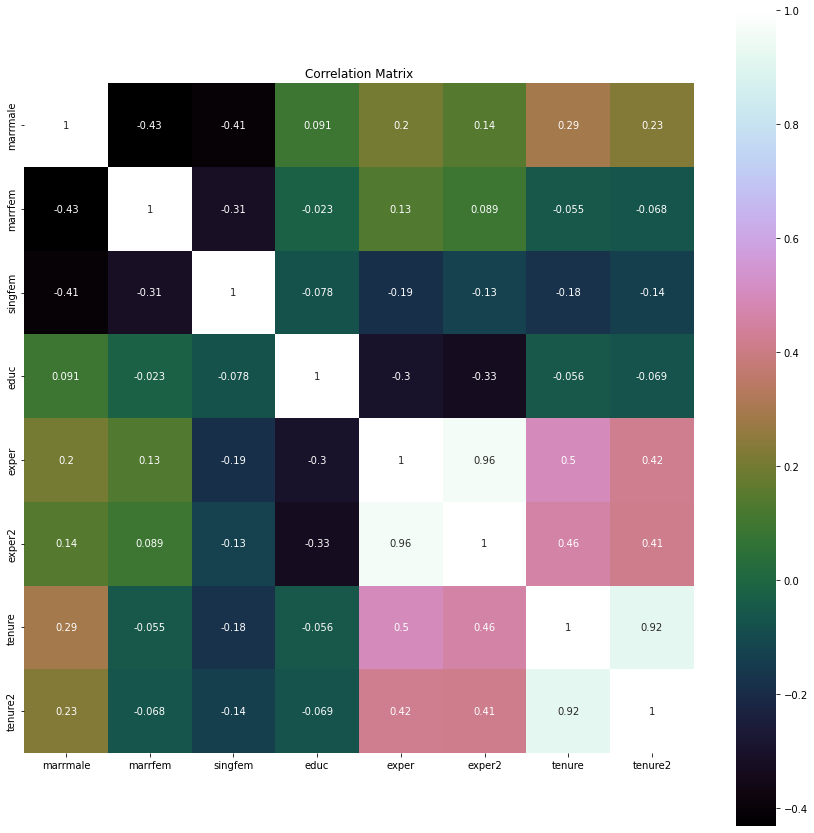

In [25]:
def cor_1(data):
    varn=wage1[list(pd.DataFrame(data.params).index)[1:]]
    from matplotlib import pyplot
    import seaborn as sns
    correlation = varn.corr()
    pyplot.figure(figsize=(15,15))
    pyplot.title('Correlation Matrix')
    return sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
cor_1(reswage1) # replace reswage1 by the name of the object of your result

In [26]:
mod = smf.ols(formula='ly~  exper+exper2', data=wage1)
reswage1_1 = mod.fit()
print("Table 2",reswage1_1.summary())

Table 2                             OLS Regression Results                            
Dep. Variable:                     ly   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     30.35
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           3.38e-13
Time:                        10:48:04   Log-Likelihood:                -384.56
No. Observations:                 526   AIC:                             775.1
Df Residuals:                     523   BIC:                             787.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2953      0.049     26.177 

In that matrix, we can see that exp and exp2 are correlated 96% and tenure and tenure2 

### 8.2 Heteroskedasticity-Robust Inference
This section deas whit the asumption 5. MLR 5. Homoskedasticity

In example 8.1, Wooldridge estimates the heteroskedasticity-robust standard errors. First, we make the OLS regression.

In [27]:
mod = smf.ols(formula='ly~  marrmale + marrfem+singfem+educ+exper+exper2+tenure+tenure2', data=wage1)
reswage1 = mod.fit()
print("Table 2",reswage1.summary())

Table 2                             OLS Regression Results                            
Dep. Variable:                     ly   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.28e-64
Time:                        10:48:04   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.100      3.213 

The function robse estimates the OLS standard errors, as well as the white's heteroskedasticity robust standard errors and the McKinnon and White's. 

Note. By estimating the heteroskedasticity robust standard errors, we are not proving that the model does fulfill, or not, the assumption 5, homoscedasticity. Nor correcting by the heteroskedasticity. We are just following the book examples. 

In [28]:
def robse (data,ro):
    varn=list(pd.DataFrame(data.params).index) 
    varn[0]="const"
    se = np.vstack(
        [
           [data.bse],
            [data.HC0_se],
            [data.HC1_se],
        ]
    )
    se = np.round(se, ro)
    colnames = varn
    rownames = ["OLS", "OLS_HC0", "OLS_HC3"]
    tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
    return tabl
# Just need to type the name function name, robse, followed by
# the fit object inside parentheses, on this case reswage1, and a number of digits to round.  
robse(reswage1,4)

,const,marrmale,marrfem,singfem,educ,exper,exper2,tenure,tenure2
OLS,0.1,0.0554,0.0578,0.0557,0.0067,0.0052,0.0001,0.0068,0.0002
OLS_HC0,0.1085,0.0567,0.0583,0.0566,0.0074,0.0051,0.0001,0.0069,0.0002
OLS_HC3,0.1095,0.0571,0.0588,0.0571,0.0074,0.0051,0.0001,0.0069,0.0002


- OLS is the OLS standard errors.
- HC0 is White's (1980) heteroskedasticity robust standard errors.
- HC1 is MacKinnon and White's (1985) heteroskedasticity robust standard errors.

Note: In the example 8.1, the book applyies OLS and MacKinnon and White's

### The Breusch-Pagan Test for Heteroskedasticity:

In [29]:
hprice1=pd.read_csv("data/hprice1.csv",index_col=0)
hprice1=sm.add_constant(hprice1,prepend=False)
hprice1

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft,const
1,300.0,349.100006,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934,1.0
2,370.0,351.500000,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198,1.0
3,191.0,217.699997,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482,1.0
4,195.0,231.800003,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938,1.0
5,373.0,319.100006,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630,1.0
...,...,...,...,...,...,...,...,...,...,...,...
84,295.0,318.299988,3,6056,1837,1,5.686975,5.762994,8.708805,7.515889,1.0
85,236.0,259.399994,3,5828,1715,0,5.463832,5.558371,8.670429,7.447168,1.0
86,202.5,258.100006,3,6341,1574,0,5.310740,5.553347,8.754792,7.361375,1.0
87,219.0,232.000000,2,6362,1185,0,5.389072,5.446737,8.758098,7.077498,1.0


In [30]:
mod = smf.ols(formula='price ~  lotsize+sqrft+bdrms', data=hprice1)
#rescimr1 = mod.fit(cov_type='nonrobust')
res_ols = mod.fit()
#res_ols = mod.fit(cov_type='HC1')
print("Table 4",res_ols.summary())

Table 4                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.70e-20
Time:                        10:48:05   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739 

In [31]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(res_ols.resid, res_ols.model.exog)
lzip(name, [round(test[i],4) for i in range(len(test))] )

[('Lagrange multiplier statistic', 14.0924),
 ('p-value', 0.0028),
 ('f-value', 5.3389),
 ('f p-value', 0.002)]

Rememer that, if the p-value is sufficiently small, that is, below the chosen significance level, then we reject the null hypothesis of homoskedasticity.

When log of the price, lotsize and sqrft

In [32]:
mod = smf.ols(formula='lprice ~  llotsize+lsqrft+bdrms', data=hprice1)
#rescimr1 = mod.fit(cov_type='nonrobust')
res_ols1 = mod.fit()
print("Table 4",res_ols1.summary())

Table 4                             OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           9.74e-19
Time:                        10:48:05   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.651     -1.992 

In [33]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(res_ols1.resid, res_ols1.model.exog)
lzip(name, [round(test[i],4) for i in range(len(test))] )

[('Lagrange multiplier statistic', 4.2232),
 ('p-value', 0.2383),
 ('f-value', 1.4115),
 ('f p-value', 0.2451)]

The logarithm on the variables corrects for heteroskedasticity because now we can´t reject the null hypothesis of homoscedasticity. This model fulfills assumption 5.

### 8.4 Weighted Least Squares Estimation
xample 8.6 Financial Wealth Equation

In [34]:
k401ksubs=pd.read_csv("data/k401ksubs.csv",index_col=0)
k401ksubs=sm.add_constant(k401ksubs,prepend=False)
k401ksubs=k401ksubs[k401ksubs["fsize"]==1]
k401ksubs["e-25"]=pow(k401ksubs["age"]-25,2)
k401ksubs

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq,const,e-25
1,0,13.170000,0,0,40,1,4.575000,0,1,173.448898,1600,1.0,225
2,1,61.230000,0,1,35,1,154.000000,1,0,3749.112793,1225,1.0,100
5,0,22.614000,0,0,53,1,18.450001,0,0,511.393005,2809,1.0,784
10,1,29.100000,0,1,45,1,29.600000,0,1,846.809998,2025,1.0,400
16,0,19.073999,0,1,43,1,0.000000,0,0,363.817444,1849,1.0,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259,0,28.572001,0,1,28,1,-0.180000,0,0,816.359192,784,1.0,9
9260,1,57.282001,0,0,36,1,28.579000,1,0,3281.227783,1296,1.0,121
9261,0,73.458000,0,0,30,1,9.900000,0,0,5396.077637,900,1.0,25
9268,0,16.968000,0,0,49,1,69.199997,0,1,287.913025,2401,1.0,576


To generate the heteroscedasticity robust standard errors we need to add the argument cov_type='HC1' into the mod.fit() function. Remember that HC1 is MacKinnon and White's (1985) heteroskedasticity robust standard errors.

In [35]:
mod = smf.ols(formula='nettfa ~  inc', data=k401ksubs)
res_ols = mod.fit(cov_type='HC1')
print("Table 4",res_ols.summary())

Table 4                             OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     62.76
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           3.83e-15
Time:                        10:48:05   Log-Likelihood:                -10565.
No. Observations:                2017   AIC:                         2.113e+04
Df Residuals:                    2015   BIC:                         2.115e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.5710      2.530     -4.178 

In [36]:
y=k401ksubs["nettfa"]
X=k401ksubs[["const","inc"]]

In [37]:
h=1/k401ksubs["inc"]
mod_wls = sm.WLS(y, X, weights=h)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.071
Model:                            WLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     153.7
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           4.52e-34
Time:                        10:48:05   Log-Likelihood:                -10128.
No. Observations:                2017   AIC:                         2.026e+04
Df Residuals:                    2015   BIC:                         2.027e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5807      1.653     -5.795      0.0

In [38]:
y=k401ksubs["nettfa"]
X=k401ksubs[["const","inc","e-25","male","e401k"]]

In [39]:
h=1/k401ksubs["inc"]
mod_wls = sm.WLS(y, X, weights=h)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.112
Model:                            WLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     63.13
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.51e-50
Time:                        10:48:05   Log-Likelihood:                -10083.
No. Observations:                2017   AIC:                         2.018e+04
Df Residuals:                    2012   BIC:                         2.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7025      1.958     -8.530      0.0

### GLS
Example 8.7 Demand for Cigarettes

In [40]:
smoke=pd.read_csv("data/smoke.csv",index_col=0)
smoke=sm.add_constant(smoke,prepend=False)
smoke["age2"]=pow(smoke["age"],2)
smoke

,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric,const,age2
1,16.0,60.506001,1,46,20000,0,0,9.903487,2116,4.102743,1.0,2116
2,16.0,57.882999,1,40,30000,0,0,10.308952,1600,4.058424,1.0,1600
3,12.0,57.664001,1,58,30000,3,0,10.308952,3364,4.054633,1.0,3364
4,13.5,57.882999,1,30,20000,0,0,9.903487,900,4.058424,1.0,900
5,10.0,58.320000,1,17,20000,0,0,9.903487,289,4.065945,1.0,289
...,...,...,...,...,...,...,...,...,...,...,...,...
803,18.0,61.818001,0,52,30000,20,0,10.308952,2704,4.124195,1.0,2704
804,18.0,61.675999,1,31,12500,0,0,9.433484,961,4.121895,1.0,961
805,16.0,60.707001,1,30,20000,0,0,9.903487,900,4.106059,1.0,900
806,10.0,59.987999,1,18,20000,0,0,9.903487,324,4.094144,1.0,324


In [41]:
mod = smf.ols(formula='cigs ~  lincome+lcigpric+educ+age+age2+restaurn', data=smoke)
res_ols = mod.fit()
print("Table 4",res_ols.summary())

Table 4                             OLS Regression Results                            
Dep. Variable:                   cigs   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     7.423
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           9.50e-08
Time:                        10:48:05   Log-Likelihood:                -3236.2
No. Observations:                 807   AIC:                             6486.
Df Residuals:                     800   BIC:                             6519.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6398     24.079     -0.151 

The next function gets the GLS, when the weigths $\hat{h}$ are estimated as the equation 8.33
\begin{align}
\hat{h} =exp(\hat{g})
\\\hat{g}=log(\hat{u}^2)\ on\ x_{1},x_{2},..,x_{k} 
\end{align}

In [42]:
def gls_1(data,res):
    lres_u=np.log(pow(res.resid,2))
    data["lres_u"]=lres_u
    
    varn=list(pd.DataFrame(res.params).index) 
    varn[0]="const"
    X1=data[varn]
    y1=data["lres_u"]
    mod=sm.OLS(y1,X1)
    res_ols1 = mod.fit()
    
    hhat=np.exp(list(res_ols1.fittedvalues))
    X=data[varn]
    y=res.model.endog
    gls_model = sm.GLS(y, X, sigma=hhat)
    gls_results = gls_model.fit()
    return print(gls_results.summary())
gls=gls_1(smoke,res_ols) # just ned to introduce the data frame and the result of the OLS model
gls

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            GLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     17.06
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.32e-18
Time:                        10:48:05   Log-Likelihood:                -3207.8
No. Observations:                 807   AIC:                             6430.
Df Residuals:                     800   BIC:                             6462.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6355     17.803      0.317      0.7